1️⃣ DRIVE MOUNT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


proper my drive path

In [ ]:
!ls /content/drive/MyDrive/Bone_Fracture_Detection_CNN


00_README  01_Data  02_Notebooks  03_Models  04_Utils  05_Outputs


DATASET PATH

In [ ]:
import os

BASE_DIR = "/content/drive/MyDrive/Bone_Fracture_Detection_CNN/01_Data/raw/bone fracture dataset"

TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR   = os.path.join(BASE_DIR, "val")
TEST_DIR  = os.path.join(BASE_DIR, "test")

print("Train:", os.listdir(TRAIN_DIR))
print("Val:", os.listdir(VAL_DIR))
print("Test:", os.listdir(TEST_DIR))


Train: ['fractured', 'not fractured']
Val: ['not fractured', 'fractured']
Test: ['not fractured', 'fractured']


IMAGE COUNT

In [ ]:
def count_images(folder):
    counts = {}
    for cls in os.listdir(folder):
        cls_path = os.path.join(folder, cls)
        counts[cls] = len(os.listdir(cls_path))
    return counts

print("Train:", count_images(TRAIN_DIR))
print("Val  :", count_images(VAL_DIR))
print("Test :", count_images(TEST_DIR))


Train: {'fractured': 4606, 'not fractured': 4640}
Val  : {'not fractured': 492, 'fractured': 337}
Test : {'not fractured': 268, 'fractured': 238}


SAMPLE IMAGE VISUALIZATION

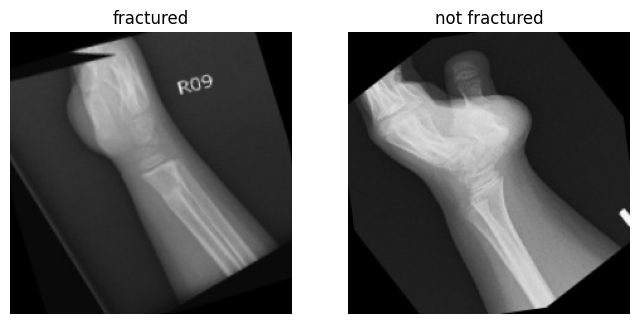

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

def show_samples(folder):
    classes = os.listdir(folder)
    plt.figure(figsize=(8,4))

    for i, cls in enumerate(classes):
        cls_path = os.path.join(folder, cls)
        img_name = random.choice(os.listdir(cls_path))
        img_path = os.path.join(cls_path, img_name)

        img = Image.open(img_path)
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")

    plt.show()

show_samples(TRAIN_DIR)


In [ ]:
import os

BASE_PATH = "/content/drive/MyDrive"

for root, dirs, files in os.walk(BASE_PATH):
    if "train" in dirs:
        print("FOUND train folder at:")
        print(os.path.join(root, "train"))
        break


FOUND train folder at:
/content/drive/MyDrive/Bone_Fracture_Detection_CNN/01_Data/raw/bone fracture dataset/train


In [ ]:
import os

TRAIN_DIR = "/content/drive/MyDrive/Bone_Fracture_Detection_CNN/01_Data/raw/bone fracture dataset/train"

print("Train folder exists:", os.path.exists(TRAIN_DIR))
print("Classes:", os.listdir(TRAIN_DIR))


Train folder exists: True
Classes: ['fractured', 'not fractured']


IMAGE LOAD

Image path: /content/drive/MyDrive/Bone_Fracture_Detection_CNN/01_Data/raw/bone fracture dataset/train/fractured/9-rotated2-rotated2-rotated3 (1).jpg
Size: (224, 224)
Mode: RGB


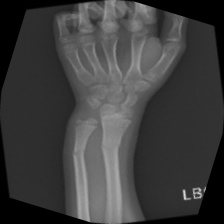

In [ ]:
from PIL import Image
import random
import os

cls = os.listdir(TRAIN_DIR)[0]   # auto pick class
cls_path = os.path.join(TRAIN_DIR, cls)

img_name = random.choice(os.listdir(cls_path))
img_path = os.path.join(cls_path, img_name)

img = Image.open(img_path)

print("Image path:", img_path)
print("Size:", img.size)
print("Mode:", img.mode)

img


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


Image Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)


Train Generator

In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


Found 9246 images belonging to 2 classes.


Validation Generator

In [ ]:
VAL_DIR = TRAIN_DIR.replace("train", "val")

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


Found 829 images belonging to 2 classes.


Class Mapping

In [ ]:
train_generator.class_indices


{'fractured': 0, 'not fractured': 1}

CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


Model Summary (VERIFY)

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Train Model

In [17]:
EPOCHS = 3
BATCH_SIZE = 32

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
  9/289 ━━━━━━━━━━━━━━━━━━━━ 39:24 8s/step - accuracy: 0.5822 - loss: 0.7859

KeyboardInterrupt: 

for model save on drive

In [ ]:
import os

MODEL_DIR = "/content/drive/MyDrive/Bone_Fracture_Detection_CNN/03_Models"
os.makedirs(MODEL_DIR, exist_ok=True)

MODEL_PATH = os.path.join(MODEL_DIR, "bone_fracture_model_phase1.h5")

model.save(MODEL_PATH)

print("✅ Model successfully saved at:", MODEL_PATH)


In [ ]:
import os
os.path.getsize(MODEL_PATH) / (1024*1024)
